In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
#Load dataset
df = pd.read_csv(r"E:\MNIST Dataset\train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0


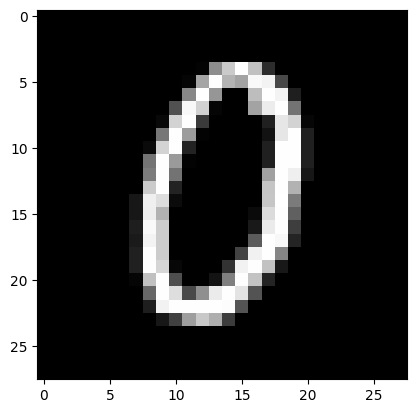

In [56]:
image_sample = np.reshape(df.iloc[5, 1:], (28, 28))
plt.imshow(image_sample)
print(df['label'][5])

In [57]:
#Preprocess data
data = np.array(df)
print(data.shape)

(42000, 785)


In [58]:
#Train and dev split
np.random.shuffle(data)
train_data = data[:41000].T
X_train = train_data[1:]
y_train = train_data[0]
dev_data = data[41000:].T
X_dev = dev_data[1: ]
y_dev = dev_data[0]

In [59]:
X_train = X_train / 255.
X_dev = X_dev / 255.

In [60]:
#Initialize paramters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [61]:
#Activation functions
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)

In [62]:
#Forward propagation
def forward_prop(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [63]:
#One-hot encoding
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max()+1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [64]:
def ReLU_derivative(Z):
    return Z>0

In [65]:
#Backward propagtion
def backprop(Z1, A1, Z2, A2, W2, X, y):
    m = y.size
    one_hot_y = one_hot(y)
    dZ2 = A2 - one_hot_y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_derivative(Z1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [66]:
#Updation of paramters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2

In [67]:
#Predictions and accuracy
def get_predictions(A2):
    return np.argmax(A2, axis=0)
def get_accuracy(predictions, y):
    return np.sum(predictions==y)/y.size

In [68]:
#Gradient descent
def gradient_descent(X, y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W2, X, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10==0:
            print(f'Iteration: {i}, Accuracy: {get_accuracy(get_predictions(A2), y):.2f}')
    return W1, b1, W2, b2

In [69]:
#Train the model
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, 0.1)

Iteration: 0, Accuracy: 0.05
Iteration: 10, Accuracy: 0.15
Iteration: 20, Accuracy: 0.27
Iteration: 30, Accuracy: 0.34
Iteration: 40, Accuracy: 0.39
Iteration: 50, Accuracy: 0.45
Iteration: 60, Accuracy: 0.49
Iteration: 70, Accuracy: 0.53
Iteration: 80, Accuracy: 0.57
Iteration: 90, Accuracy: 0.60
Iteration: 100, Accuracy: 0.62
Iteration: 110, Accuracy: 0.65
Iteration: 120, Accuracy: 0.67
Iteration: 130, Accuracy: 0.69
Iteration: 140, Accuracy: 0.70
Iteration: 150, Accuracy: 0.71
Iteration: 160, Accuracy: 0.73
Iteration: 170, Accuracy: 0.74
Iteration: 180, Accuracy: 0.75
Iteration: 190, Accuracy: 0.76
Iteration: 200, Accuracy: 0.76
Iteration: 210, Accuracy: 0.77
Iteration: 220, Accuracy: 0.78
Iteration: 230, Accuracy: 0.78
Iteration: 240, Accuracy: 0.79
Iteration: 250, Accuracy: 0.79
Iteration: 260, Accuracy: 0.80
Iteration: 270, Accuracy: 0.80
Iteration: 280, Accuracy: 0.81
Iteration: 290, Accuracy: 0.81
Iteration: 300, Accuracy: 0.81
Iteration: 310, Accuracy: 0.82
Iteration: 320, Acc

In [70]:
#Make predictions
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(X, W1, b1, W2, b2)
    return get_predictions(A2)

def visualize_sample_image(image, title):
    image = image.reshape(28, 28) * 255
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

#Test a prediction
def test_prediction(index, X, y, W1, b1, W2, b2):
    input_image = X[:, index, None]
    prediction = make_predictions(input_image, W1, b1, W2, b2)
    label = y[index]
    print(f"Prediction: {prediction}, Label: {label}")
    visualize_sample_image(input_image, f"Prediction: {prediction}, Label: {label}")

Prediction: [0], Label: 0


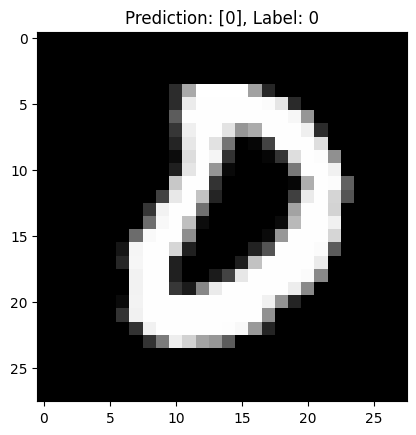

Prediction: [1], Label: 8


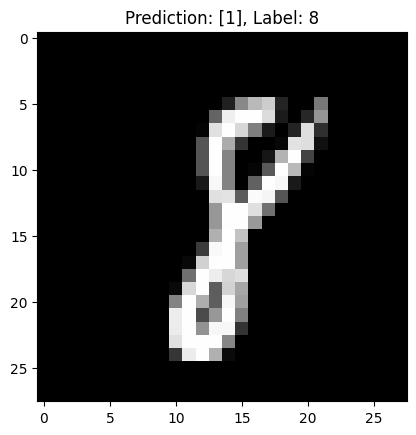

Prediction: [8], Label: 8


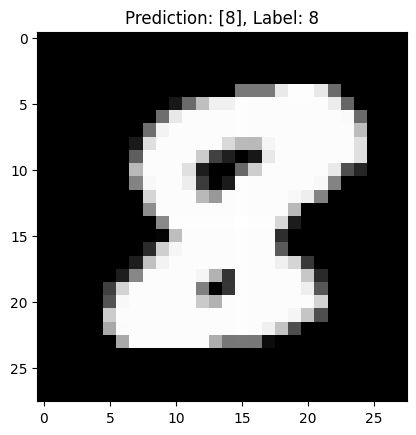

Prediction: [7], Label: 7


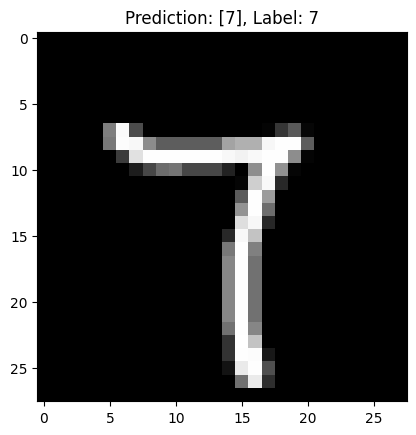

Prediction: [6], Label: 6


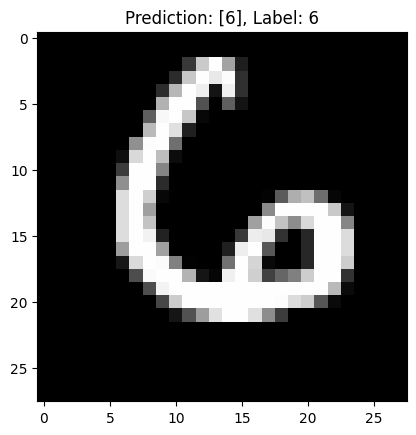

In [72]:
#Test multiple samples
random_indices = np.random.choice(range(X_train.shape[1]), 5, replace=False) 
for index in random_indices:
    test_prediction(index, X_train, y_train, W1, b1, W2, b2)